# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

631


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Build query URL and request results in Fahrenheit.

# Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#query_url

In [4]:
# set up lists to hold reponse info
city_name = []
cloudiness = []
country =[]
date = []
humidity =[]
lat = []
lng = []
maxtemp = []
windspeed = []

# variable to count the number of cities. This is used to stop calling the API after data for 500 cities are available,
# to avoid API call rate limits
count_city = 0

# count variables used to avoid api call rate limits
count_record = 0
count_set = 1

print("Beginning Data Retrieval")     
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each city
for city in cities:
    
#   To avoid api call rate limits, get city weather data in sets of 50 cities, then sleep for 5 seconds 
    count_record = count_record + 1
    if count_record == 51:
        count_record = 1
        count_set = count_set + 1
        time.sleep(5)
    
#   To avoid api call rate limits, if the data for 500+ cities are available, break from the loop 
    if count_city > 500:
        break
        
    response = requests.get(query_url + city).json()
    
#   Append the required details to the corresponding lists for the cities, if available in the OpenWeatherMap API
    try:
#       Append the required lists    
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        windspeed.append(response["wind"]["speed"])
        
#       counter to break the for loop when the data for 500+ cities are available    
        count_city = count_city + 1
        
#       Print on console for city found        
        print(f"Processing Record {count_record} of Set {count_set} | {city}")

# Handle exceptions for citites that are not available in the OpenWeatherMap API
    except:
        # Print on console for city not found
        print("City not found. Skipping...")
        pass
    
print("-----------------------------")
print("Data Retrieval Complete")      
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | kavieng
Processing Record 2 of Set 1 | kavaratti
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | piacabucu
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | tynda
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | poya
Processing Record 9 of Set 1 | uribia
Processing Record 10 of Set 1 | caravelas
City not found. Skipping...
Processing Record 12 of Set 1 | ahipara
Processing Record 13 of Set 1 | lebu
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | issum
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | taksimo
City not found. Skipping...
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | kruisfontein
Processing Record 22 of Set 1 | torbay
Processing Record 23 of Set 1 | kahului
Processing Record 24 of Set 1 | rikitea
Processing Record 

Processing Record 7 of Set 5 | cidreira
Processing Record 8 of Set 5 | shilka
Processing Record 9 of Set 5 | ewa beach
Processing Record 10 of Set 5 | yaan
Processing Record 11 of Set 5 | taltal
Processing Record 12 of Set 5 | mattawa
Processing Record 13 of Set 5 | kishtwar
Processing Record 14 of Set 5 | ribeira grande
Processing Record 15 of Set 5 | west bay
Processing Record 16 of Set 5 | erenhot
Processing Record 17 of Set 5 | zharkent
Processing Record 18 of Set 5 | killam
Processing Record 19 of Set 5 | pringsewu
Processing Record 20 of Set 5 | mwene-ditu
Processing Record 21 of Set 5 | nouakchott
Processing Record 22 of Set 5 | sitka
Processing Record 23 of Set 5 | novobiryusinskiy
Processing Record 24 of Set 5 | yellowknife
Processing Record 25 of Set 5 | badarpur
Processing Record 26 of Set 5 | richards bay
Processing Record 27 of Set 5 | wuwei
Processing Record 28 of Set 5 | brewster
Processing Record 29 of Set 5 | luderitz
City not found. Skipping...
Processing Record 31 of

Processing Record 14 of Set 9 | oyama
Processing Record 15 of Set 9 | kishorganj
Processing Record 16 of Set 9 | tarauaca
Processing Record 17 of Set 9 | young
Processing Record 18 of Set 9 | warren
Processing Record 19 of Set 9 | lasa
Processing Record 20 of Set 9 | niquero
Processing Record 21 of Set 9 | norilsk
Processing Record 22 of Set 9 | evensk
Processing Record 23 of Set 9 | flinders
Processing Record 24 of Set 9 | barisal
Processing Record 25 of Set 9 | horqueta
Processing Record 26 of Set 9 | pitimbu
Processing Record 27 of Set 9 | baherden
Processing Record 28 of Set 9 | gat
Processing Record 29 of Set 9 | yumen
Processing Record 30 of Set 9 | cap malheureux
Processing Record 31 of Set 9 | labrea
Processing Record 32 of Set 9 | coari
Processing Record 33 of Set 9 | kandrian
Processing Record 34 of Set 9 | kailua
Processing Record 35 of Set 9 | shimoda
Processing Record 36 of Set 9 | usinsk
Processing Record 37 of Set 9 | hirara
Processing Record 38 of Set 9 | kendari
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe to store the weather data of the 500+ cities
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": maxtemp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": windspeed,
    "Country": country,
    "Date": date,
}

weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,85.95,61,100,5.46,PG,1665538862
1,Kavaratti,10.5669,72.6420,81.21,74,100,7.05,IN,1665538862
2,Carnarvon,-24.8667,113.6333,65.14,46,48,25.90,AU,1665538862
3,Piaçabuçu,-10.4056,-36.4344,74.37,82,6,10.47,BR,1665538862
4,Bethel,41.3712,-73.4140,59.65,80,0,1.01,US,1665538862
...,...,...,...,...,...,...,...,...,...
496,Dombås,62.0696,9.1235,30.15,88,87,3.78,NO,1665538952
497,Kharp,66.8014,65.8081,36.36,93,78,6.08,RU,1665538998
498,Peace River,56.2501,-117.2860,52.11,40,40,3.44,CA,1665538998
499,Rochester,43.1548,-77.6156,61.14,72,0,0.00,US,1665538998


In [6]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,20.319914,17.994615,61.683154,70.948104,58.253493,7.962495,1.665539e+09
std,33.072110,94.936720,17.650700,20.215175,40.134843,5.787288,7.058658e+01
min,-54.800000,-179.166700,5.650000,7.000000,0.000000,0.000000,1.665539e+09
25%,-7.258600,-69.363200,50.160000,59.000000,18.000000,3.620000,1.665539e+09
50%,24.433300,23.450000,64.400000,76.000000,75.000000,6.850000,1.665539e+09
75%,47.907700,108.629100,76.680000,86.000000,100.000000,10.650000,1.665539e+09
max,78.218600,179.316700,94.980000,100.000000,100.000000,33.800000,1.665539e+09


In [7]:
# Export the data to a csv file, with a header for the index and the columns in the required order
weather_data.to_csv(output_data_file,index_label="City_ID",
                    columns=["City","Cloudiness","Country","Date","Humidity","Lat","Lng","Max Temp","Wind Speed"],
                    encoding="utf-8")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# Identify the cities with a humidity greater than 100%. The next 2 steps are commented as there are no results for this query.
humidity_gt_100 = weather_data[(weather_data["Humidity"] > 100)]
humidity_gt_100

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
#  Get the indices of cities that have humidity over 100%.
#humidity_gt_100.index

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#clean_city_data = weather_data.drop(humidity_gt_100.index,inplace=False)
#clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

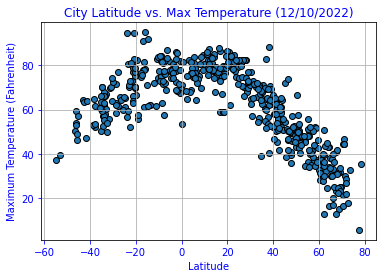

In [11]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Maximum Temperature (Fahrenheit)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Max_Temperature_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

## Latitude vs. Humidity Plot

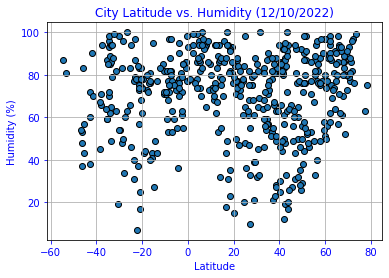

In [12]:
# Build a scatter plot for Latitude Vs. Max Temperature
plt.scatter(weather_data["Lat"], weather_data["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Humidity (%)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Humidity_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

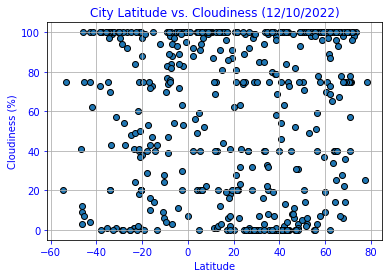

In [13]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Cloudiness (%)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Cloudiness_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

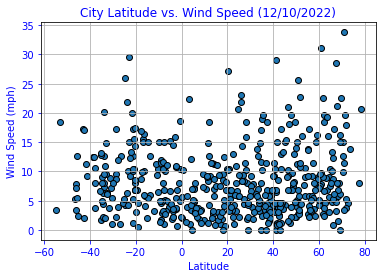

In [14]:
# Build a scatter plot for Latitude Vs. Humidity
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.Timestamp.today().strftime('%d/%m/%Y')})",color="blue")
plt.ylabel("Wind Speed (mph)",color="blue")
plt.xlabel("Latitude",color="blue")
plt.tick_params(color = "blue", labelcolor="blue")
plt.grid(True)

# Save the figure
plt.savefig("output_data/WeatherPy/City_Latitude_vs_Wind Speed_" + str(pd.Timestamp.today().strftime('%d-%m-%Y')) + ".png",dpi=300)

# Show plot
plt.show()

## Linear Regression

In [15]:
# Create dataframe for Northern Hemisphere
n_hemisphere_weather = weather_data[(weather_data["Lat"] >= 0)]
n_hemisphere_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Kavaratti,10.5669,72.6420,81.21,74,100,7.05,IN,1665538862
4,Bethel,41.3712,-73.4140,59.65,80,0,1.01,US,1665538862
5,Tynda,55.1667,124.7167,36.12,67,100,2.64,RU,1665538681
8,Uribia,11.7139,-72.2660,82.27,76,69,14.90,CO,1665538863
13,Fortuna,40.5982,-124.1573,57.92,85,75,3.44,US,1665538864
...,...,...,...,...,...,...,...,...,...
496,Dombås,62.0696,9.1235,30.15,88,87,3.78,NO,1665538952
497,Kharp,66.8014,65.8081,36.36,93,78,6.08,RU,1665538998
498,Peace River,56.2501,-117.2860,52.11,40,40,3.44,CA,1665538998
499,Rochester,43.1548,-77.6156,61.14,72,0,0.00,US,1665538998


In [16]:
# Create dataframe for Southern Hemisphere
s_hemisphere_weather = weather_data[(weather_data["Lat"] < 0)]
s_hemisphere_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kavieng,-2.5744,150.7967,85.95,61,100,5.46,PG,1665538862
2,Carnarvon,-24.8667,113.6333,65.14,46,48,25.90,AU,1665538862
3,Piaçabuçu,-10.4056,-36.4344,74.37,82,6,10.47,BR,1665538862
6,Mataura,-46.1927,168.8643,59.18,37,3,3.47,NZ,1665538863
7,Poya,-21.3500,165.1500,81.59,57,100,5.21,NC,1665538863
...,...,...,...,...,...,...,...,...,...
469,Launceston,-41.4500,147.1667,64.04,70,100,9.22,AU,1665538993
470,Narrabri,-30.3167,149.7833,74.52,54,100,1.01,AU,1665538993
476,Santa Elena,-2.2333,-80.8500,68.76,85,53,10.89,EC,1665538994
479,Bambous Virieux,-20.3428,57.7575,70.05,78,20,6.91,MU,1665538995


In [17]:
# Create a function to calculate the Linear Regression 
def linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos):

    slope, intercept, rvalue, pvalue, stderr = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    print(f"The r-value is: {rvalue}")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x_values, y_values)
    plt.title(f"{hemisphere} Hemisphere ({pd.Timestamp.today().strftime('%d/%m/%Y')}) \n {y_label} vs. {x_label} Linear Regression",color="blue")
    plt.xlabel(f"{x_label}",color="blue")
    plt.ylabel(f"{y_label}",color="blue")
    plt.tick_params(color = "blue", labelcolor="blue")

    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(text_pos),fontsize=15,color="red")
    
    plt.savefig(f"output_data/WeatherPy/{hemisphere}_Hemisphere_{y_label}_vs_{x_label}_Linear_Regression_{str(pd.Timestamp.today().strftime('%d-%m-%Y'))}.png",dpi=300)

    plt.show()
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8821027285108561


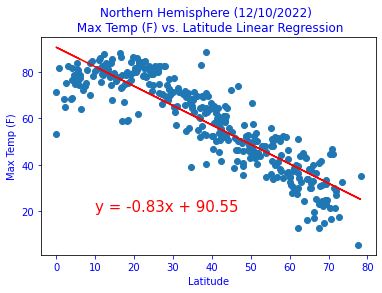

In [18]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Max Temp"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (10,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6849395910429894


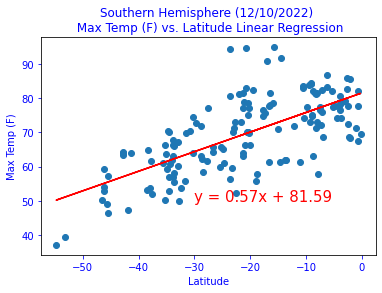

In [19]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Max Temp"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Max Temp (F)"
text_pos = (-30,50)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.004115467740888454


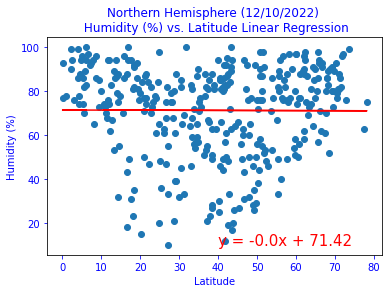

In [20]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Humidity"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (40,10)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0997527093732788


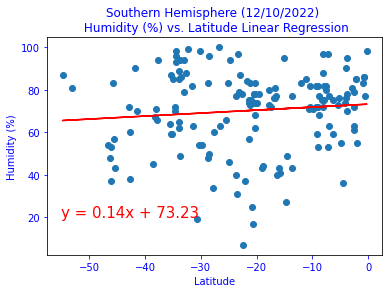

In [21]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Humidity"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Humidity (%)"
text_pos = (-55,20)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1092363009337476


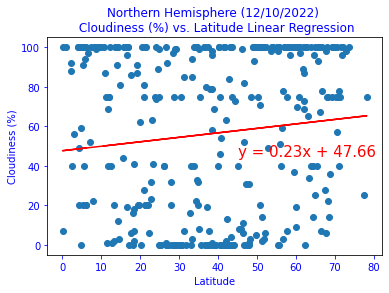

In [22]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Cloudiness"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (45,45)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12019300946433714


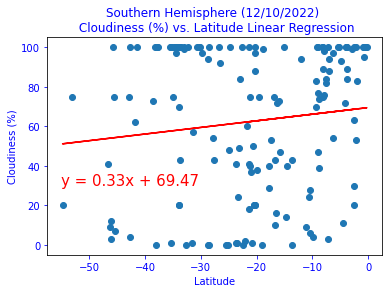

In [23]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Cloudiness"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Cloudiness (%)"
text_pos = (-55,30)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.22595480065848092


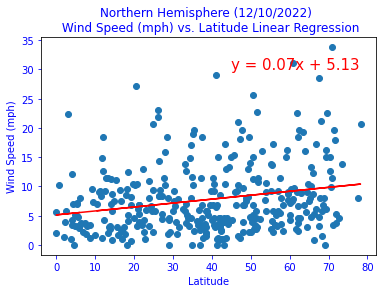

In [25]:
x_values = n_hemisphere_weather["Lat"]
y_values = n_hemisphere_weather["Wind Speed"]
hemisphere = "Northern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (45,30)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.10093402642423943


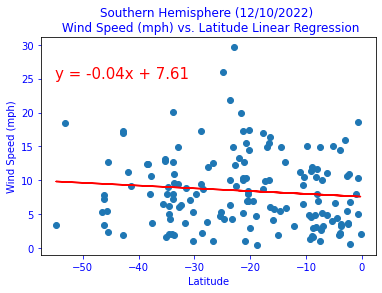

In [27]:
x_values = s_hemisphere_weather["Lat"]
y_values = s_hemisphere_weather["Wind Speed"]
hemisphere = "Southern"
x_label = "Latitude"
y_label = "Wind Speed (mph)"
text_pos = (-55,25)

linear_regression(x_values, y_values, hemisphere, x_label, y_label, text_pos)